### **BBC News Classification Project**

The problem this project is solving is classifying analyzing and classifying articles based on their contents. Methods of pre-processing text data using nltk and Tfidf Vectorizer will be used to produce efficient and effective machine learning modules. The results of this test showed that the supervised SVC produced more accurate models, while taking much longer training time and unsupervised NMF model produced a slightly less accurate, but much more efficient fit. The test data set produced an accuracy of .91 for the leaderboard (after deadline)

In [2]:
import pandas as pd
import numpy as np
import itertools
import random
import os
from itertools import permutations
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize as tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import NMF
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load The Data sets from Google drive

In [4]:
train = pd.read_csv("drive/MyDrive/ML Files/ML2/BBC News Train.csv")
test = pd.read_csv("drive/MyDrive/ML Files/ML2/BBC News Test.csv")
Answer = pd.read_csv("drive/MyDrive/ML Files/ML2/BBC News Sample Solution.csv")

View basic information about each dataset. The training dataset has the category and text, while the answer has just the category and test has just the text. All have no null values.

In [5]:
print("Train Data Sample\n")
print(train.head())
print("\nTrain Data Info\n")
print(train.info())
print("\nTrain Data Shape\n")
print(train.shape)

Train Data Sample

   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business

Train Data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB
None

Train Data Shape

(1490, 3)


In [6]:
print("Test Data Sample\n")
print(test.head())
print("\nTest Data Info\n")
print(test.info())
print("\nTest Data Shape\n")
print(test.shape)

Test Data Sample

   ArticleId                                               Text
0       1018  qpr keeper day heads for preston queens park r...
1       1319  software watching while you work software that...
2       1138  d arcy injury adds to ireland woe gordon d arc...
3        459  india s reliance family feud heats up the ongo...
4       1020  boro suffer morrison injury blow middlesbrough...

Test Data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB
None

Test Data Shape

(735, 2)


In [7]:
print("Answer Data Sample\n")
print(Answer.head())
print("\nAnswer Data Info\n")
print(Answer.info())
print("\nAnswer Data Shape\n")
print(Answer.shape)

Answer Data Sample

   ArticleId       Category
0       1018          sport
1       1319           tech
2       1138       business
3        459  entertainment
4       1020       politics

Answer Data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Category   735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB
None

Answer Data Shape

(735, 2)


This graph shows the dispersion of the articles by category of the training set. There are no large outliers, so this is a fair representation.

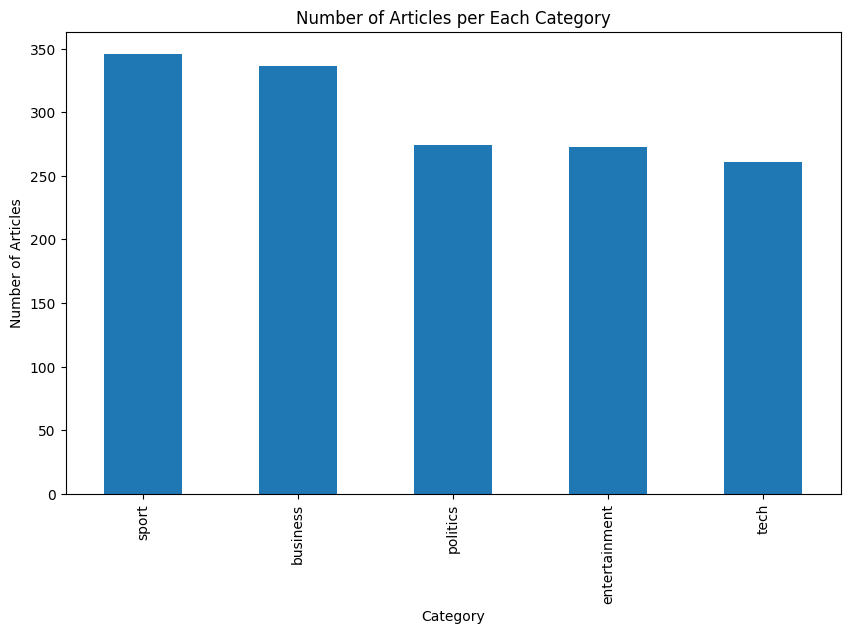

In [8]:
counts = train['Category'].value_counts()
counts
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Number of Articles per Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.show()

The length of the text strings is fairy consistent. There are a few outliers, but this is not as important as the specific words in the text string. The number of characters is also consistent, meaning that there are not inconsistencies of length and complexity of words.

In [41]:
train['length'] = train['Text'].apply(len)
print(train['length'].describe())
def count_words(text):
    return len(text.split())
train['word_count'] = train['Text'].apply(count_words)
print(train['word_count'].describe())

count     1490.000000
mean      2233.461745
std       1205.153358
min        501.000000
25%       1453.000000
50%       1961.000000
75%       2751.250000
max      18387.000000
Name: length, dtype: float64
count    1490.000000
mean      385.012752
std       210.898616
min        90.000000
25%       253.000000
50%       337.000000
75%       468.750000
max      3345.000000
Name: word_count, dtype: float64


Printed one full example of the article text and category.

In [10]:
print('Category: {}\n'.format(train['Category'][1]))
print('Text:\n{}'.format(train['Text'][1]))

Category: business

Text:
german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy.  munich-based research institute ifo said that its confidence index fell to 95.5 in february from 97.5 in january  its first decline in three months. the study found that the outlook in both the manufacturing and retail sectors had worsened. observers had been hoping that a more confident business sector would signal that economic activity was picking up.   we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner.  the main reason is probably that the domestic economy is still weak  particularly in the retail trade.  economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline . he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue.  

In [11]:
text_list = train['Text'].tolist()
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(text_list)

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

Load the English Stop Words and cleaning data from Lemmas, Stop Words,

In [13]:

def preprocess_text(text):
    # Removing Single Letter
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Removing Punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Removing Numbers
    text = re.sub(r'\d+', '', text)
    # Removing Extra White Space
    text = re.sub(r'\s+', ' ', text)
    return text


def cleantext(text):
  text = text.str.lower()
  text = preprocess_text(test)
  tokenized_text = tokenize(text)
  tokenized_text = [words for words in tokenized_text if words not in stopwords]
  return text


In [14]:
lemmatize = spacy.load("en_core_web_sm")
stopwords = set(stopwords.words('english'))
def cleantext(text):
    text = preprocess_text(text)
    tokenized_text = tokenize(text)
    words = [word for word in tokenized_text if word not in stopwords]
    text = lemmatize(text)
    words = [token.lemma_ for token in text]
    text = ' '.join(words)

    return text

In [15]:
vectorize = np.vectorize(cleantext)
train_clean = vectorize(train['Text'])
test_clean = vectorize(test['Text'])

Store the cleaned and vectorized data in the dataframe. Also visual comparison between the original and cleaned text for one article. As can be seen, the single letters, punctuation, and plurals.

In [16]:
print(train['Text'][1])
print(train_clean[1])
train['Clean_Text']=train_clean
train['Clean_Text']

german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy.  munich-based research institute ifo said that its confidence index fell to 95.5 in february from 97.5 in january  its first decline in three months. the study found that the outlook in both the manufacturing and retail sectors had worsened. observers had been hoping that a more confident business sector would signal that economic activity was picking up.   we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner.  the main reason is probably that the domestic economy is still weak  particularly in the retail trade.  economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline . he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue.  germany s economy grew 1.6

0       worldcom exboss launches defence lawyer defend...
1       german business confidence slide german busine...
2       bbc poll indicate economic gloom citizen in ma...
3       lifestyle govern mobile choice fast well or fu...
4       enron boss in m payout eighteen former enron d...
                              ...                        
1485    double eviction from big brother model caprice...
1486    dj double act revamp chart show dj duo jk and ...
1487    weak dollar hit reuter revenue at medium group...
1488    apple ipod family expand market apple have exp...
1489    santy worm make unwelcome visit thousand of we...
Name: Clean_Text, Length: 1490, dtype: object

In [17]:
vectorizer = TfidfVectorizer()
vector = vectorizer.fit(train_clean)
trainX = vector.transform(train_clean)
testX = vector.transform(test_clean)
trainy = train['Category']
testy = Answer['Category']

Above is vectorizing the cleaned data and stored the x and y variables for the training and test sets. Below is training a model with one set of hyperparameters.

In [18]:
n_components = len(np.unique(train['Category'].values))
max_iter = [100, 200, 400, 600, 800]
init = ['random', 'nndsvda', 'nndsvdar']
l1_ratio = [0.0,0.25,0.5,1.0]

In [19]:
model = NMF(n_components=5, init=init[1],max_iter=200, l1_ratio=0.5)
model_fit = model.fit(X=trainX, y = trainy)
print(pd.DataFrame(model.transform(trainX)).head())
preds = model_fit.transform(trainX)
predictions = np.argmax(preds, axis=1)
predictions

          0         1         2         3         4
0  0.045488  0.047132  0.006263  0.001484  0.000000
1  0.163457  0.000000  0.000000  0.000000  0.000000
2  0.101132  0.036118  0.024172  0.055519  0.006977
3  0.000000  0.000000  0.000000  0.248850  0.000000
4  0.108228  0.012401  0.017555  0.015391  0.030934


array([1, 0, 0, ..., 0, 3, 3])

The above model produced an accuracy score of .89, which is very accurate.

In [20]:
classify = LogisticRegression()
classify.fit(preds, trainy)
pred = classify.predict(preds)
accuracy_score(trainy, pred)

0.8919463087248322

Creating a pipeline and training 188 models using hyperparameters for both the Tfidf Vectorizer and NMF. The score is being calculated by the accuracy score module for sklearn.

In [22]:
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words = 'english', encoding = 'latin-1', ngram_range = (1,2))), ('nmf', NMF()), ('classifier', LogisticRegression())
    ])
parameters = {
        'tfidf__max_df': [0.85,0.90,0.95],
        'tfidf__min_df': [0,2, 4],
        'nmf__init': ['nndsvda', 'random'],
        'nmf__n_components': [5],
        'nmf__l1_ratio': [0, 0.5, 1],
        'nmf__beta_loss': ['frobenius', 'kullback-leibler'],
        'nmf__max_iter': [200, 400]
    }
scoring = make_scorer(accuracy_score)
gridsearch = GridSearchCV(pipeline, param_grid = parameters, scoring = scoring)
gridsearch.fit(train['Clean_Text'], trainy)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 400 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

GridSearchCV(estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(encoding='latin-1',
                                                        ngram_range=(1, 2),
                                                        stop_words='english')),
                                       ('nmf', NMF()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'nmf__beta_loss': ['frobenius', 'kullback-leibler'],
                         'nmf__init': ['nndsvda', 'random'],
                         'nmf__l1_ratio': [0, 0.5, 1],
                         'nmf__max_iter': [200, 400], 'nmf__n_components': [5],
                         'tfidf__max_df': [0.85, 0.9, 0.95],
                         'tfidf__min_df': [0, 2, 4]},
             scoring=make_scorer(accuracy_score))

The best score for any of the models is .90 with the below best parameters.

In [23]:
gridsearch.best_estimator_
print(gridsearch.best_params_)
gridsearch.best_score_

{'nmf__beta_loss': 'frobenius', 'nmf__init': 'nndsvda', 'nmf__l1_ratio': 0, 'nmf__max_iter': 200, 'nmf__n_components': 5, 'tfidf__max_df': 0.9, 'tfidf__min_df': 4}


0.9013422818791946

Below is a pipeline to train a supervised svc model. This produced a very accurate .98 accuracy.

In [34]:
pipeline1 = Pipeline([('tfidf', TfidfVectorizer(stop_words = 'english', encoding = 'latin-1', ngram_range = (1,2))), ('svc', SVC())])
params = {'tfidf__max_df': [0.85,0.90,0.95],
          'tfidf__min_df': [0,2, 4],
          'svc__C': [0.1, 1, 10]
          ,'svc__kernel': ['rbf']
          ,'svc__gamma': [0.1, 1, 10]}
gridsearch1 = GridSearchCV(pipeline1, param_grid = params, scoring = scoring)

In [35]:
gridsearch1.fit(train['Clean_Text'], trainy)

GridSearchCV(estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(encoding='latin-1',
                                                        ngram_range=(1, 2),
                                                        stop_words='english')),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10], 'svc__gamma': [0.1, 1, 10],
                         'svc__kernel': ['rbf'],
                         'tfidf__max_df': [0.85, 0.9, 0.95],
                         'tfidf__min_df': [0, 2, 4]},
             scoring=make_scorer(accuracy_score))

In [38]:
print(gridsearch1.best_score_)
gridsearch1.best_params_

0.9778523489932887


{'svc__C': 10,
 'svc__gamma': 0.1,
 'svc__kernel': 'rbf',
 'tfidf__max_df': 0.85,
 'tfidf__min_df': 2}

### **Synopsis/Conclusion**

The supervised learning model of SVC is more accurate for the models trained than the NMF unsupervised model, though each has their positived and negatives.

For the SVC model, this had an accuracy of .98, which is very accurate than the unsupervised NMF model. This is likely because there are labeled categories to train on, which leads to better accuracy than an unsupervised model which determines the groups organically. However, the disadvantage of SVC is the significant length of time it took to train the models, about 35 minutes of time. The NMF model was complete in less than half that time.

The benefits of NMF is the much shorter time it took (with more combinations) than the more accurate SVC model. With completely unlabeled data, this dataset would be much more accurate than the supervised model meaning it still holds significant value. In all, both models had good to great accuracy with moderate to good performance time. This was tested in collab with an upgraded GPU, which likely decreased processing time and could be shortened further with a better GPU.

The below code is to save the answer file from the unsupervised learning model.

In [43]:
Answer1 = pd.DataFrame()
Answer1['ArticleId'] = Answer['ArticleId']
Answer1['Category'] = gridsearch.predict(test_clean)


In [49]:
Answer1.to_csv('Competition_Answer.csv', index = False)

In [50]:
from google.colab import files
files.download('Competition_Answer.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>